## **Abstract**

To implement k-means algorithm using self-written functions to implement the k-means iterative algorithm procedure. By guessing the initial centroids and refining the assignments over multiple iterations we can segregate the dataset into cohesive clusters.

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
#k-means algorithm

def findClosestCentroids(X,centroids):

  # *************** Number of centroids **************
  K = len(centroids)

  # *********** Initialize empty dataframe ***********
  idx = np.zeros((len(X),1))

  # *************** Number of example ****************
  num_of_example = len(X)

  for i in range(0,num_of_example):

      # Pointer for each centroid
      k = 0
      min_ = 0

      while k < K:
        
        temp = ((X.iloc[i,:] - centroids.iloc[k,:])**2).sum()

        if (min_ > temp or k == 0):
          min_ = temp
          idx[i,0] = k

        k = k + 1

  return idx

def computeCentroids(X,idx,K):

  (m,n) = X.shape

  centroids = np.zeros((K,n))

  #Pointers
  k = 0

  while k < K:

    centroids[k,:] = X.iloc[idx==k,:].mean()

    k = k + 1

  centroids = pd.DataFrame(centroids, columns = X.columns)
  return centroids

def runKmeans(X, initial_centroids, max_iters):

  # ****** Initialize values *****
  (m,n) = X.shape;

  # ****** Number of clusters ******
  K = len(initial_centroids)

  # ****** Create temporary variables *****
  centroids = initial_centroids;
  previous_centroids = centroids;

  # ****** Empty assignment array *******
  idx = np.zeros((len(X),1))

  for i in range(1,max_iters):

    idx = findClosestCentroids(X,centroids)
    previous_centroids = centroids

    centroids = computeCentroids(X,idx,K)

  return [centroids,idx]

def randomInitCentroid(X,K):

  return X.sample(n=K, random_state=1)


## Loading dataset

In [158]:
X = pd.read_csv('https://raw.githubusercontent.com/tambeani/ADS_Assignment/main/dataset.csv')

## **Data exploration**

In [159]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      300 non-null    float64
 1   X2      300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [160]:
X.describe()

,X1,X2
count,300.000000,300.000000
mean,3.684376,2.987101
std,1.925578,1.685079
min,-0.245130,0.205810
25%,2.156175,1.210775
50%,3.231550,2.949750
75%,5.509525,4.807775
max,8.203400,5.784300


## **K-means for K = 2**

In [161]:
k = 2

In [162]:
# Initial centroids
init_centroids = randomInitCentroid(X,k)
[centroids_,idx_] = runKmeans(X,init_centroids,10)

## **Plotting scatterplot for k = 2**

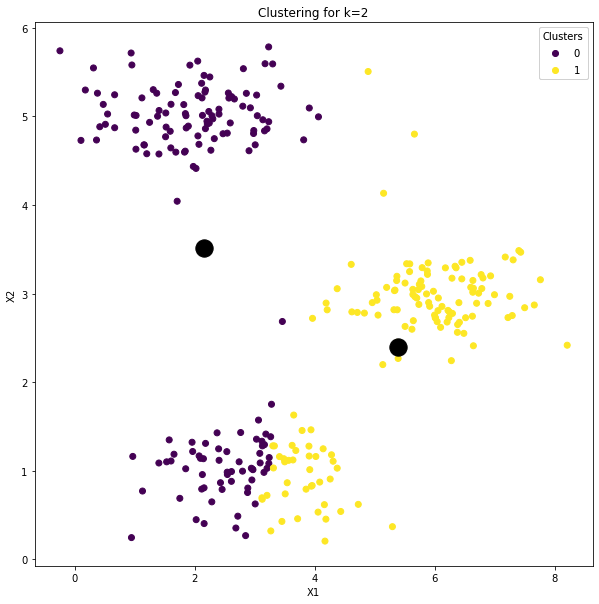

In [163]:
fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X['X1'], X['X2'], c=idx_)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.scatter(centroids_['X1'],centroids_['X2'],c = "black",s=300)
plt.title('Clustering for k=2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## **K-means for K = 3**

In [164]:
k = 3

In [165]:
init_centroids = randomInitCentroid(X,k)
[centroids_,idx_] = runKmeans(X,init_centroids,10)

## **Plotting scatterplot for k = 3**

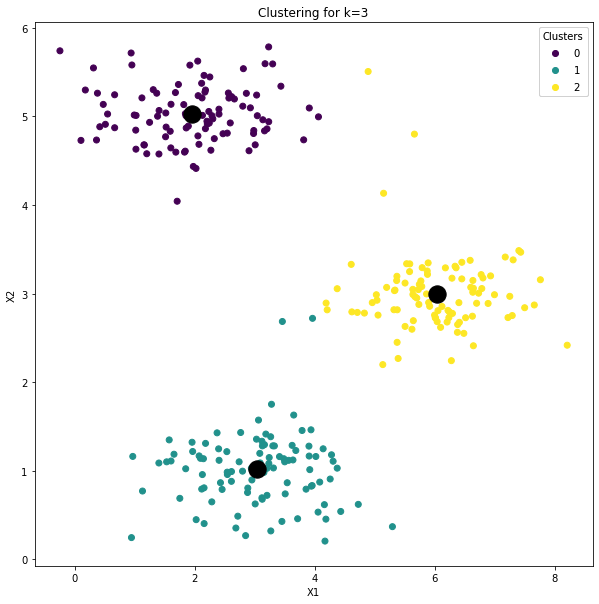

In [166]:
fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X['X1'], X['X2'], c=idx_)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.scatter(centroids_['X1'],centroids_['X2'],c = "black",s=300)
plt.title('Clustering for k=3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## **K-means for K = 4**

In [167]:
k = 4

In [168]:
init_centroids = randomInitCentroid(X,k)
[centroids_,idx_] = runKmeans(X,init_centroids,10)

## **Plotting scatterplot for k = 4**

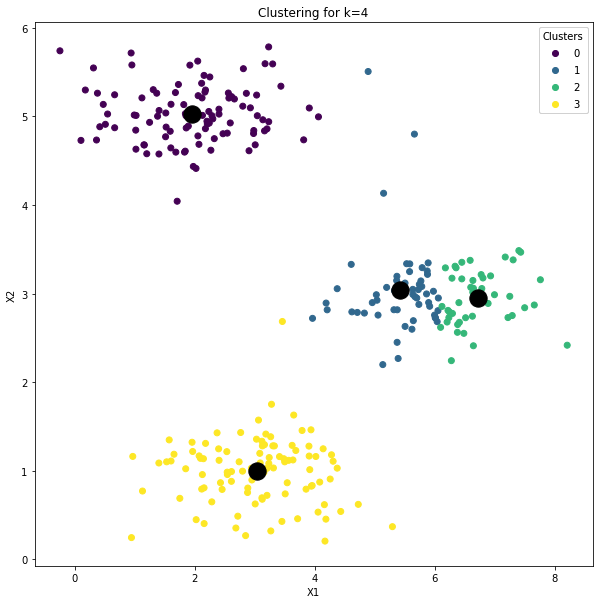

In [169]:
fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X['X1'], X['X2'], c=idx_)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.scatter(centroids_['X1'],centroids_['X2'],c = "black",s=300)
plt.title('Clustering for k=4')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## **Conclusion**

By calculating the Euclidean distance & minimizing over the similarity score we are able to cluster our dataset effectively

Copyright 2022 Aniruddha Tambe

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.